## [作業重點]
使用 Sklearn 中的 Lasso, Ridge 模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義。

機器學習的模型非常多種，但要訓練的資料多半有固定的格式，確保你了解訓練資料的格式為何，這樣在應用新模型時，就能夠最快的上手開始訓練！

## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則化來觀察訓練情形。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression(without regularization)

In [2]:
boston = datasets.load_boston()

x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=4)

regr = linear_model.LinearRegression()

regr.fit(x_train, y_train)

y_pred = regr.predict(x_test)

In [3]:
print(regr.coef_)

[-1.15966452e-01  4.71249231e-02  8.25980146e-03  3.23404531e+00
 -1.66865890e+01  3.88410651e+00 -1.08974442e-02 -1.54129540e+00
  2.93208309e-01 -1.34059383e-02 -9.06296429e-01  8.80823439e-03
 -4.57723846e-01]


In [4]:
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred))

Mean Squared Error :  25.41958712682191


# Lasso

In [5]:
lasso = linear_model.Lasso(alpha=0.5)

lasso.fit(x_train, y_train)

y_pred = lasso.predict(x_test)

In [6]:
print(lasso.coef_)

[-0.08860117  0.04829133 -0.01107435  0.         -0.          2.66101769
 -0.00307949 -0.98440282  0.25664031 -0.01593271 -0.73252329  0.00884426
 -0.59210164]


In [7]:
print("Mean Squared Error : ", mean_squared_error(y_test, y_pred))

Mean Squared Error :  26.94483860388666


# Ridge

In [8]:
ridge = linear_model.Ridge(alpha=1)

ridge.fit(x_train, y_train)

y_pred = ridge.predict(x_test)

In [9]:
print(ridge.coef_)

[-1.12499445e-01  4.79562332e-02 -2.40438147e-02  2.96199458e+00
 -9.33966118e+00  3.93079015e+00 -1.73821202e-02 -1.43347691e+00
  2.75239392e-01 -1.38920708e-02 -8.31116943e-01  9.15637729e-03
 -4.66460539e-01]


In [10]:
print("Mean Squared Error : ", mean_squared_error(y_test, y_pred))

Mean Squared Error :  25.7436840800126


# alpha 對 mse 在 Lasso / Ridge 中的影響

In [11]:
def my_lasso(alpha):
    lasso = linear_model.Lasso(alpha)
    lasso.fit(x_train, y_train)
    y_pred = lasso.predict(x_test)
    return mean_squared_error(y_test, y_pred)

def my_ridge(alpha):
    ridge = linear_model.Ridge(alpha)
    ridge.fit(x_train, y_train)
    y_pred = ridge.predict(x_test)
    return mean_squared_error(y_test, y_pred)    

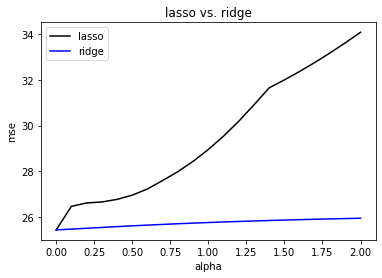

In [12]:
import warnings
warnings.filterwarnings('ignore')

a = [i/10 for i in range(0,21)]
lasso_mse = []
ridge_mse = []

for alpha in a:
    ridge_mse.append(my_ridge(alpha))
    lasso_mse.append(my_lasso(alpha))

plt.plot(a, lasso_mse, color='black', label='lasso')
plt.plot(a, ridge_mse, color='blue', label = 'ridge')
plt.xlabel('alpha');plt.ylabel('mse')
plt.title('lasso vs. ridge')
plt.legend()
plt.show()